# UM6P hackathon report (part 2)

## TajTech
### Mundiapolis

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import plotly.express as px
%matplotlib inline


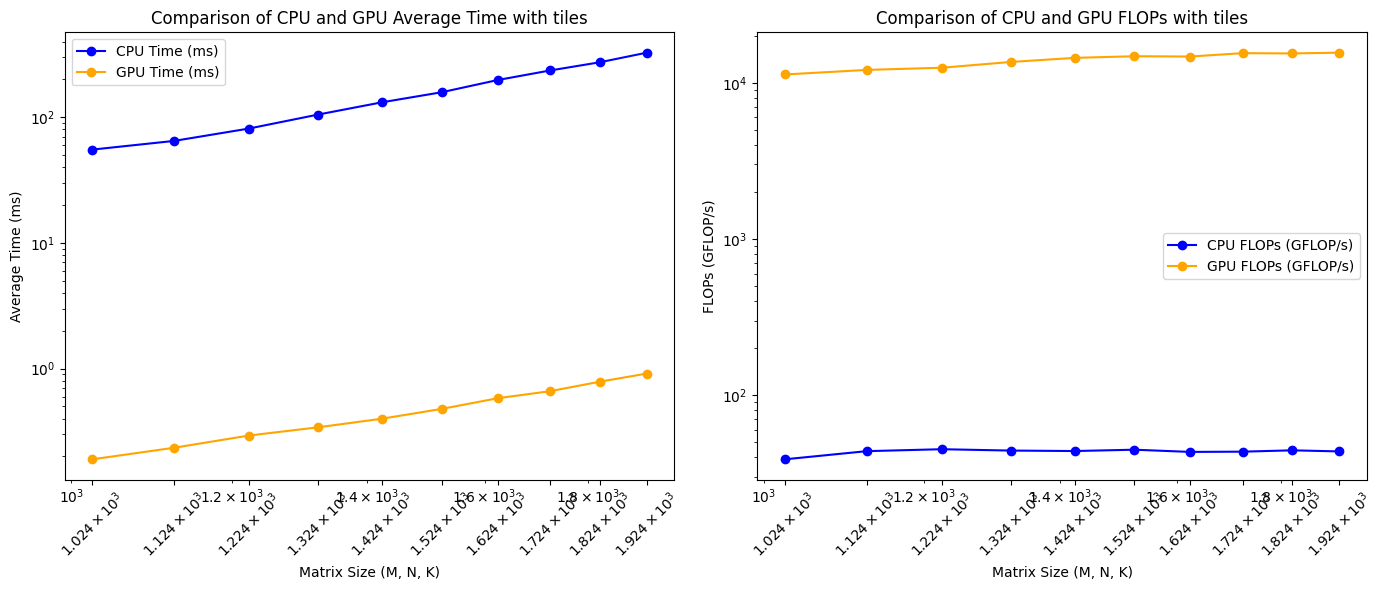

In [12]:
# Load the new CSV data
file_path = 'data/gemmtotask3.csv'
data = pd.read_csv(file_path)

# Extract the relevant columns
matrix_sizes = data['M']
cpu_times = data['AverageTimeCPU(ms)']
gpu_times = data['AverageTimeGPU(ms)']
cpu_flops = data['PerformanceCPU(GFLOP/s)']
gpu_flops = data['PerformanceGPU(GFLOP/s)']

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot CPU vs GPU average times on the first subplot with log scale
ax[0].plot(matrix_sizes, cpu_times, label='CPU Time (ms)', color='blue', marker='o')
ax[0].plot(matrix_sizes, gpu_times, label='GPU Time (ms)', color='orange', marker='o')
ax[0].set_title('Comparison of CPU and GPU Average Time with tiles', fontsize=12)
ax[0].set_xlabel('Matrix Size (M, N, K)', fontsize=10)
ax[0].set_ylabel('Average Time (ms)', fontsize=10)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xticks(matrix_sizes)  # Ensure proper scaling on x-axis
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
ax[0].legend()

# Plot CPU vs GPU FLOPs on the second subplot with log scale
ax[1].plot(matrix_sizes, cpu_flops, label='CPU FLOPs (GFLOP/s)', color='blue', marker='o')
ax[1].plot(matrix_sizes, gpu_flops, label='GPU FLOPs (GFLOP/s)', color='orange', marker='o')
ax[1].set_title('Comparison of CPU and GPU FLOPs with tiles', fontsize=12)
ax[1].set_xlabel('Matrix Size (M, N, K)', fontsize=10)
ax[1].set_ylabel('FLOPs (GFLOP/s)', fontsize=10)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xticks(matrix_sizes)  # Ensure proper scaling on x-axis
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
ax[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/gemmTileBatchTests.csv')

# Create a new column 'Matrix Size' by combining M, N, K
df['Matrix Size'] = df['M'].astype(str) + 'x' + df['N'].astype(str) + 'x' + df['K'].astype(str)

# Plot 1: TimeGPU vs Matrix Size
fig1 = px.line(df, x='Matrix Size', y='TimeGPU(ms)',
               title='GPU Time vs Matrix Size',
               labels={'Matrix Size': 'Matrix Size', 'TimeGPU(ms)': 'TimeGPU (ms)'})
fig1.show()

# Plot 2: PerformanceGPU vs Matrix Size
fig2 = px.line(df, x='Matrix Size', y='PerformanceGPU(GFLOP/s)',
               title='GPU Performance vs Matrix Size',
               labels={'Matrix Size': 'Matrix Size', 'PerformanceGPU(GFLOP/s)': 'PerformanceGPU (GFLOP/s)'})
fig2.show()


In [15]:
# Load the fixed matrix size CSV file into a DataFrame
df = pd.read_csv('data/gemmTileBatchTestsFixedMNK.csv')

# Create a new column 'Tile Size' by combining tileM and tileN
df['Tile Size'] = df['tileM'].astype(str) + 'x' + df['tileN'].astype(str)

# Plot 1: TimeGPU vs Tile Size
fig1 = px.line(df, x='Tile Size', y='TimeGPU(ms)',
               title='GPU Time vs Tile Size',
               labels={'Tile Size': 'Tile Size (tileM x tileN)', 'TimeGPU(ms)': 'TimeGPU (ms)'})
fig1.show()

# Plot 2: PerformanceGPU vs Tile Size
fig2 = px.line(df, x='Tile Size', y='PerformanceGPU(GFLOP/s)',
               title='GPU Performance vs Tile Size',
               labels={'Tile Size': 'Tile Size (tileM x tileN)', 'PerformanceGPU(GFLOP/s)': 'PerformanceGPU (GFLOP/s)'})
fig2.show()


In [16]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/gemmTileBatch_PerformanceByBatchcount.csv')

# Plot 1: TimeGPU vs BatchCount
fig1 = px.line(df, x='BatchCount', y='TimeGPU(ms)',
               title='GPU Time vs BatchCount',
               labels={'BatchCount': 'Batch Size', 'TimeGPU(ms)': 'TimeGPU (ms)'})
fig1.show()

# Plot 2: PerformanceGPU vs BatchCount
fig2 = px.line(df, x='BatchCount', y='PerformanceGPU(GFLOP/s)',
               title='GPU Performance vs BatchCount',
               labels={'BatchCount': 'Batch Size', 'PerformanceGPU(GFLOP/s)': 'PerformanceGPU (GFLOP/s)'})
fig2.show()


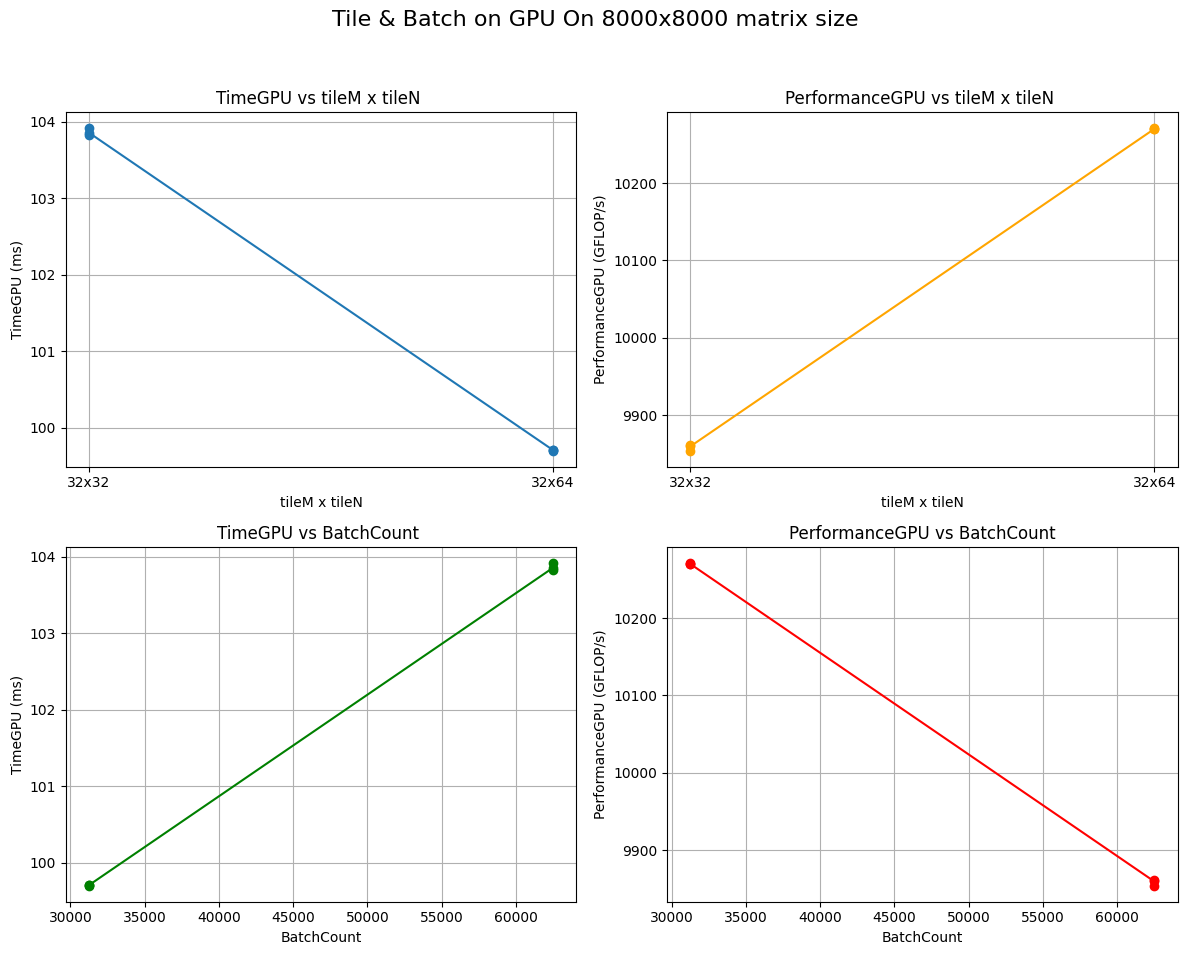

In [20]:
# Load the data
file_path = "data/tileBatch8000MNK.csv"
data = pd.read_csv(file_path)

# Prepare new columns for composite x-axes
data['tileM_x_tileN'] = data['tileM'].astype(str) + 'x' + data['tileN'].astype(str)


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Tile & Batch on GPU On 8000x8000 matrix size", fontsize=16)

# First plot: tileM x tileN vs TimeGPU
axes[0, 0].plot(data['tileM_x_tileN'], data['TimeGPU(ms)'], marker='o')
axes[0, 0].set_title(f"TimeGPU vs tileM x tileN ")
axes[0, 0].set_xlabel("tileM x tileN")
axes[0, 0].set_ylabel("TimeGPU (ms)")
axes[0, 0].grid(True)

# Second plot: tileM x tileN vs PerformanceGPU
axes[0, 1].plot(data['tileM_x_tileN'], data['PerformanceGPU(GFLOP/s)'], marker='o', color='orange')
axes[0, 1].set_title(f"PerformanceGPU vs tileM x tileN ")
axes[0, 1].set_xlabel("tileM x tileN")
axes[0, 1].set_ylabel("PerformanceGPU (GFLOP/s)")
axes[0, 1].grid(True)

# Third plot: BatchCount vs TimeGPU
axes[1, 0].plot(data['BatchCount'], data['TimeGPU(ms)'], marker='o', color='green')
axes[1, 0].set_title(f"TimeGPU vs BatchCount ")
axes[1, 0].set_xlabel("BatchCount")
axes[1, 0].set_ylabel("TimeGPU (ms)")
axes[1, 0].grid(True)

# Fourth plot: BatchCount vs PerformanceGPU
axes[1, 1].plot(data['BatchCount'], data['PerformanceGPU(GFLOP/s)'], marker='o', color='red')
axes[1, 1].set_title(f"PerformanceGPU vs BatchCount")
axes[1, 1].set_xlabel("BatchCount")
axes[1, 1].set_ylabel("PerformanceGPU (GFLOP/s)")
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
